# 🧮 Étude : Figures Géométriques — Aires et Visualisations

|     |                     |
| --- | ------------------- |
| Nom | Lachi lahlou |
| 🆔  | 300150410          |

Ce notebook démontre l’utilisation d’une hiérarchie de classes Python :

- `Figure` (classe de base)
- `Carre`
- `Cercle`

Puis l'affichage graphique grâce à :

- **matplotlib 3.9.2**
- **numpy 2.1.3**

Nous allons :
1. définir les classes dans le notebook  
2. créer un carré et un cercle  
3. tracer les figures graphiquement  

In [13]:
from carre import Carre
from cercle import Cercle

c1 = Carre(4)
c2 = Cercle(3)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def afficher_carre(carre):
    cote = carre.cote
    x = [0, cote, cote, 0, 0]
    y = [0, 0, cote, cote, 0]

    plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.fill(x, y, alpha=0.3)
    plt.title(f"Carré — côté={cote}, aire={carre.aire()}")
    plt.axis("equal")
    plt.grid(True)
    plt.show()
    

In [16]:
def afficher_cercle(cercle):
    r = cercle.rayon
    theta = np.linspace(0, 2*np.pi, 300)

    x = r * np.cos(theta)
    y = r * np.sin(theta)

    plt.figure(figsize=(5, 5))
    plt.plot(x, y)
    plt.fill(x, y, alpha=0.3)
    plt.title(f"Cercle — rayon={r}, aire={cercle.aire():.2f}")
    plt.axis("equal")
    plt.grid(True)
    plt.show()

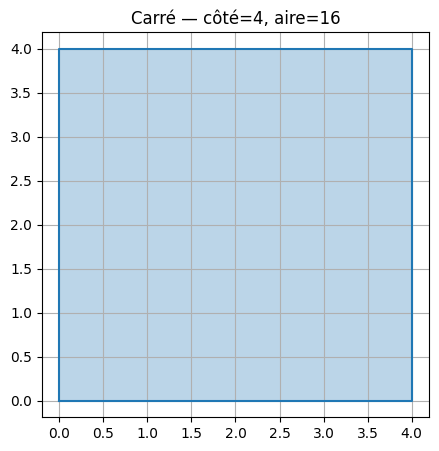

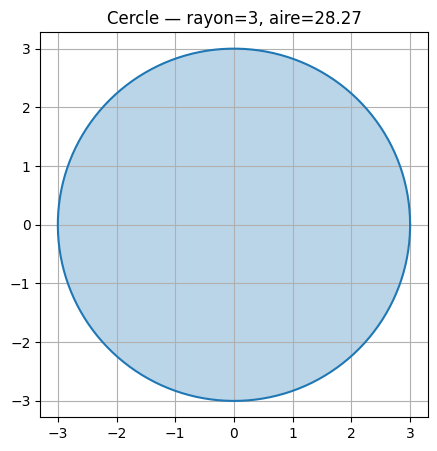

In [17]:
afficher_carre(c1)
afficher_cercle(c2)

Figure: Carré, côté=4, aire=16
Figure: Cercle, rayon=1.5, aire=7.07


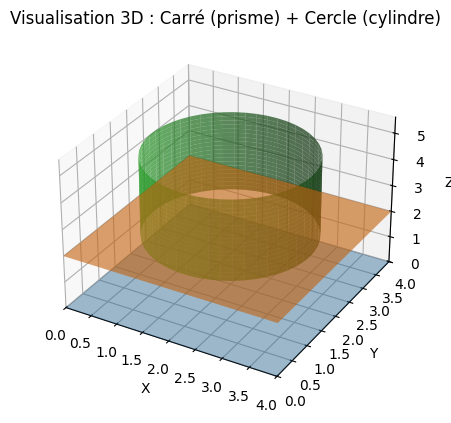

In [1]:
"""
Fichier : visualisation_3d.py
Description : Visualisation 3D créative d'un carré (prisme) et d'un cercle (cylindre)
Auteur : [300150410]
Date : 2025-11-26
"""

from carre import Carre
from cercle import Cercle
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # utile pour certains environnements


def visualiser_3d(cote, rayon):
    # Création des objets
    carre = Carre(cote)
    cercle = Cercle(rayon)

    print(carre.afficher_info())
    print(cercle.afficher_info())

    # --- Paramètres de hauteur pour la 3D ---
    hauteur_carre = cote / 2       # hauteur du prisme carré
    hauteur_cylindre = rayon * 2   # hauteur du cylindre

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.set_title("Visualisation 3D : Carré (prisme) + Cercle (cylindre)")

    # --- 1) Prisme carré (le Carré extrudé en 3D) ---
    # Base du carré : de 0 à cote sur X et Y
    x = np.linspace(0, cote, 2)
    y = np.linspace(0, cote, 2)
    X, Y = np.meshgrid(x, y)

    # Face du bas (z = 0)
    Z_bas = np.zeros_like(X)
    # Face du haut (z = hauteur_carre)
    Z_haut = np.full_like(X, hauteur_carre)

    # On dessine les deux surfaces
    ax.plot_surface(X, Y, Z_bas, alpha=0.4)
    ax.plot_surface(X, Y, Z_haut, alpha=0.6)

    # --- 2) Cylindre (le Cercle extrudé en 3D) ---
    # On centre le cylindre au milieu du carré
    centre_x = cote / 2
    centre_y = cote / 2

    theta = np.linspace(0, 2 * math.pi, 50)
    z = np.linspace(hauteur_carre, hauteur_carre + hauteur_cylindre, 20)
    Theta, Z_cyl = np.meshgrid(theta, z)

    X_cyl = centre_x + rayon * np.cos(Theta)
    Y_cyl = centre_y + rayon * np.sin(Theta)

    ax.plot_surface(X_cyl, Y_cyl, Z_cyl, alpha=0.7)

    # --- 3) Réglages de la scène ---
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Même échelle sur les axes
    max_range = max(cote, rayon * 2, hauteur_carre + hauteur_cylindre)
    ax.set_box_aspect((1, 1, 0.7))

    ax.set_xlim(0, cote)
    ax.set_ylim(0, cote)
    ax.set_zlim(0, hauteur_carre + hauteur_cylindre * 1.2)

    plt.show()


if __name__ == "__main__":
    # Exemple : tu peux changer ces valeurs
    visualiser_3d(cote=4, rayon=1.5)